In [1]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np

# from matplotlib.mlab import bivariate_normal

import cartopy.crs as ccrs
import xarray as xr

import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:

# Nx = 36
# Ny = 21
# Nz = 5
# N_parcel = 3780

Nx = 24
Ny = 21
Nz = 6
N_parcel = Nx*Ny*Nz

if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    

directory = './Lifetime/'
filename = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory+filename)

./Lifetime/Lifetime_20000101.txt


In [4]:
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

LON = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime.shape

(6, 21, 24, 10, 12, 10)

In [5]:
Pressure = [100, 75, 65, 55, 40, 30] # hPa
Height   = [16,  18, 19, 20, 22, 24] # km

In [6]:
for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            directory = '/n/home12/hongwei/HONGWEI/lagranto_era5_0.2um/Plot_python/Lifetime/'
            filename = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File = open(directory+filename, 'r')
        
            Lines = File.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line in Lines:
                a = line.split(',')
                data.append(float(a[0]))
                data_N.append(float(a[1]))
                data_S.append(float(a[2]))
                Longitude.append(float(a[3]))
                Latitude.append(float(a[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz):
                        lifetime[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

100%|██████████| 12/12 [00:01<00:00,  7.35it/s]


In [7]:
# create seasonal data

N_season = 4

lifetime_season = np.zeros((Nz, Ny, Nx, N_season, N_year))
lifetime_N_season = np.zeros((Nz, Ny, Nx, N_season, N_year))
lifetime_S_season = np.zeros((Nz, Ny, Nx, N_season, N_year))

# for Winter
lifetime_season[:,:,:,0,:] = np.mean(lifetime[:,:,:,:,[0,1,11],:], axis=(3,4))
lifetime_N_season[:,:,:,0,:] = np.mean(lifetime_N[:,:,:,:,[0,1,11],:], axis=(3,4))
lifetime_S_season[:,:,:,0,:] = np.mean(lifetime_S[:,:,:,:,[0,1,11],:], axis=(3,4))

# for Spring, Summer and Autumn
for i in range(1,N_season):
    print(i,i*3-1,(i+1)*3-1)
    lifetime_season[:,:,:,i,:]   = np.mean( lifetime[:,:,:,:,i*3-1:(i+1)*3-1,:], axis=(3,4))
    lifetime_N_season[:,:,:,i,:] = np.mean( lifetime_N[:,:,:,:,i*3-1:(i+1)*3-1,:], axis=(3,4))
    lifetime_S_season[:,:,:,i,:] = np.mean( lifetime_S[:,:,:,:,i*3-1:(i+1)*3-1,:], axis=(3,4))


lifetime_season_mean   = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season_mean = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season_mean = np.zeros((Nz, Ny, Nx, N_season))

for i in range(0,N_season):
    lifetime_season_mean[:,:,:,i] = np.mean(lifetime_season[:,:,:,i,:], axis=3)
    lifetime_N_season_mean[:,:,:,i] = np.mean(lifetime_N_season[:,:,:,i,:], axis=3)
    lifetime_S_season_mean[:,:,:,i] = np.mean(lifetime_S_season[:,:,:,i,:], axis=3)




1 2 5
2 5 8
3 8 11


### Change the Lon and Lat order, and change the lifetime data order in corresponding to the Lon/Lat order

In [8]:
LON[0,0,:,0,0,0]

array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
       165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
       330., 345.])

In [9]:
LON_1d = LON[0,0,:,0,0,0]
LAT_1d = LAT[0,:,0,0,0,0]

# First for LON: change (0,360) to (-180,180)

#################
# correst method 1:
#################
# lifetime_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_N_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_S_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))

# print("LON Before: ", LON_1d)

# for i in range(len(LON_1d)):
#     if LON_1d[i]>=180: LON_1d[i] = LON_1d[i]-360

# # sort
# idx = np.argsort(LON_1d)
# # print(idx)

# LON_1d = LON_1d[idx]
# lifetime_season_mean_new = lifetime_season_mean[:,:,idx,:]
# lifetime_N_season_mean_new = lifetime_N_season_mean[:,:,idx,:]
# lifetime_S_season_mean_new = lifetime_S_season_mean[:,:,idx,:]

# print("LON After: ", LON_1d)

# print("")
# print(lifetime_season_mean_new.shape)


#################
# wrong method 2:
#################

lifetime_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))

LON_1d = LON_1d - 180 ### shw ???
lifetime_season_mean_new = lifetime_season_mean[:,:,:,:]
lifetime_N_season_mean_new = lifetime_N_season_mean[:,:,:,:]
lifetime_S_season_mean_new = lifetime_S_season_mean[:,:,:,:]

In [10]:
# Second for LAT: change (-20,20) to (20,-20)

lifetime_season_mean_new2 = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season_mean_new2 = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season_mean_new2 = np.zeros((Nz, Ny, Nx, N_season))


print("LAT Before: ", LAT_1d)
LAT_1d = LAT_1d[::-1]
print("LAT After: ", LAT_1d)


lifetime_season_mean_new2 = lifetime_season_mean_new[:,::-1,:,:]
lifetime_N_season_mean_new2 = lifetime_N_season_mean_new[:,::-1,:,:]
lifetime_S_season_mean_new2 = lifetime_S_season_mean_new[:,::-1,:,:]

print("")
print(lifetime_season_mean_new.shape)

LAT Before:  [-30. -27. -24. -21. -18. -15. -12.  -9.  -6.  -3.   0.   3.   6.   9.
  12.  15.  18.  21.  24.  27.  30.]
LAT After:  [ 30.  27.  24.  21.  18.  15.  12.   9.   6.   3.   0.  -3.  -6.  -9.
 -12. -15. -18. -21. -24. -27. -30.]

(6, 21, 24, 4)


# *** important check ***

(1) The lat dimension should start from 20 and end at -20 for the input data in the following plotting code!!!

(2) The lon dimension should start from -180 and end at 180 for the input data in the following plotting code!!!


### calcualte the mean lifetime of selected regions in 18 km winter

In [11]:
ilon11 = 16
ilon12 = 20
LON_1d[ilon11:ilon12]

array([ 60.,  75.,  90., 105.])

In [12]:
ilon21 = 4
ilon22 = 8
LON_1d[ilon21:ilon22]

array([-120., -105.,  -90.,  -75.])

In [13]:
ilat1 = 7
ilat2 = 14
LAT_1d[ilat1:ilat2]

array([ 9.,  6.,  3.,  0., -3., -6., -9.])

In [14]:
#[1=18km, lat, lon, 0=winter]

Box_blue = np.mean(lifetime_season_mean_new2[1,ilat1:ilat2,ilon11:ilon12,0], axis=(0,1)) /365.25

Box_red = np.mean(lifetime_season_mean_new2[1,ilat1:ilat2,ilon21:ilon22,0], axis=(0,1)) /365.25

print(Box_red, Box_blue, (Box_red-Box_blue)/Box_blue)

print(f"Even in the same injection lat and altitude (18 km), \
particle lifetime from the red box can be more than 20% larger than that from blue box ")

1.0779081516247841 1.3256960333757049 -0.18691153591216722
Even in the same injection lat and altitude (18 km), particle lifetime from the red box can be more than 20% larger than that from blue box 


## The following figure is the final figure for the manuscript

18


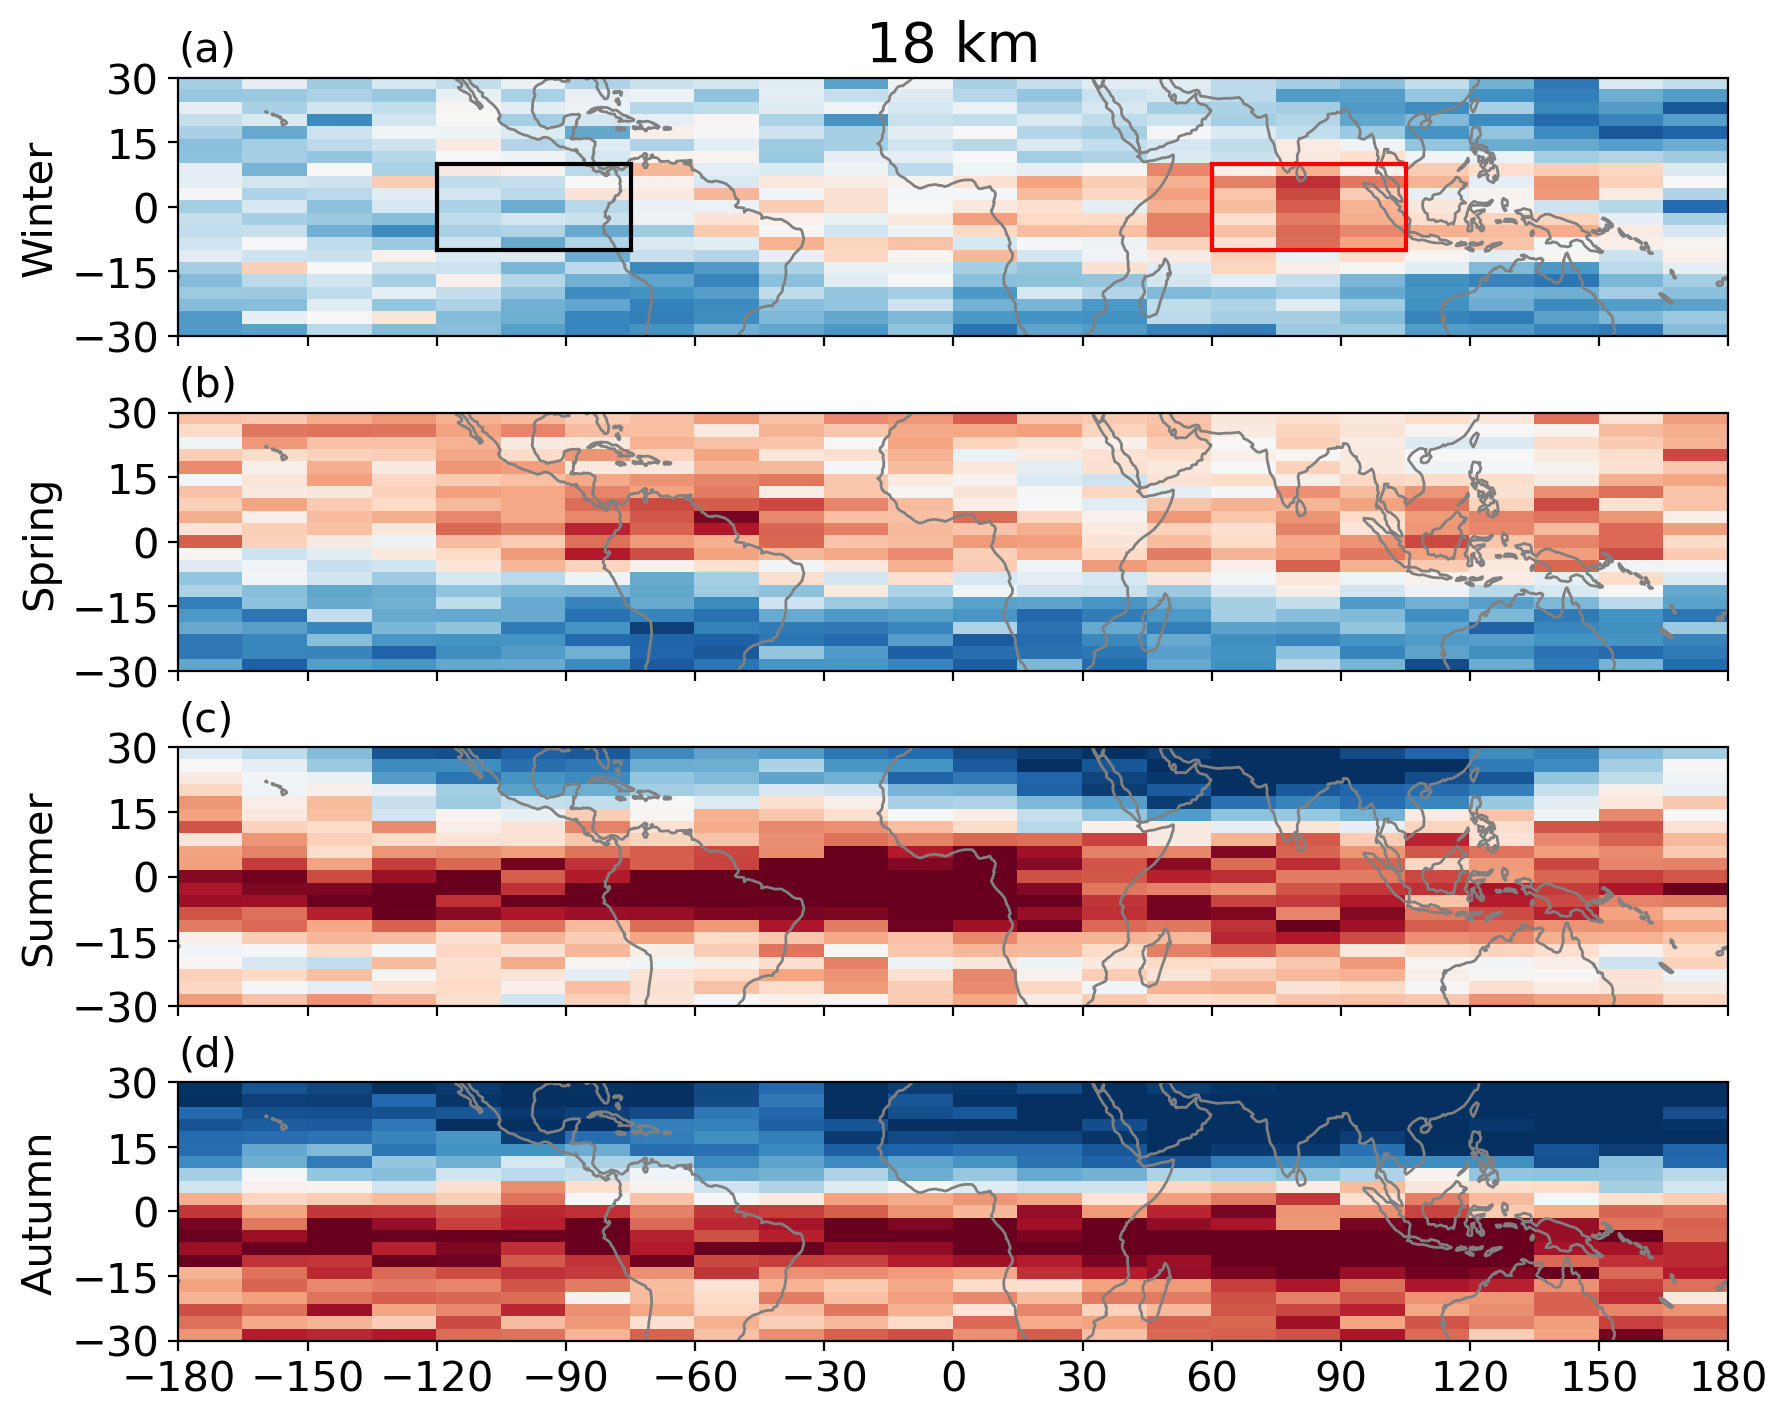

In [15]:
# Height   = [16,  18, 19, 20, 22, 24] # km

iz=1
print(Height[iz])

fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()

if iz==0:
    Day_min = 50/365.25
    Day_max = 300/365.25 
if iz==1:
    Day_min = 250/365.25
    Day_max = 600/365.25 
if iz==2:
    Day_min = 300/365.25
    Day_max = 850/365.25  
if iz==3:
    Day_min = 400/365.25
    Day_max = 1100/365.25
    
    
extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,0]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

### add box to mark the high/low lifetime center
if iz==1:
    ax1.plot([60, 105], [-10, -10], 'r-')
    ax1.plot([60, 105], [10, 10], 'r-')
    ax1.plot([60, 60], [-10, 10], 'r-')
    ax1.plot([105, 105], [-10, 10], 'r-')

    ax1.plot([-75, -120],  [-10, -10], 'k-')
    ax1.plot([-75, -120],  [10, 10],   'k-')
    ax1.plot([-75, -75],   [-10, 10],  'k-')
    ax1.plot([-120, -120], [-10, 10],  'k-')
    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("18 km", fontsize=20)
ax1.set_ylabel("Winter", fontsize=15)
ax1.set_title("(a)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,1]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("Spring", fontsize=15)
ax2.set_title("(b)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,2]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("Summer", fontsize=15)
ax3.set_title("(c)", loc='left', fontsize=15)

###
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax4_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,3]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)

ax4.tick_params(axis='x', labelsize=15 )
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_ylabel("Autumn", fontsize=15)
ax4.set_title("(d)", loc='left', fontsize=15)

# fig.colorbar(ax=ax4, orientation='horizontal')
# plt.tight_layout()
# plt.colorbar()
# plt.set_label('[year]', fontsize=12)

plt.show()

18


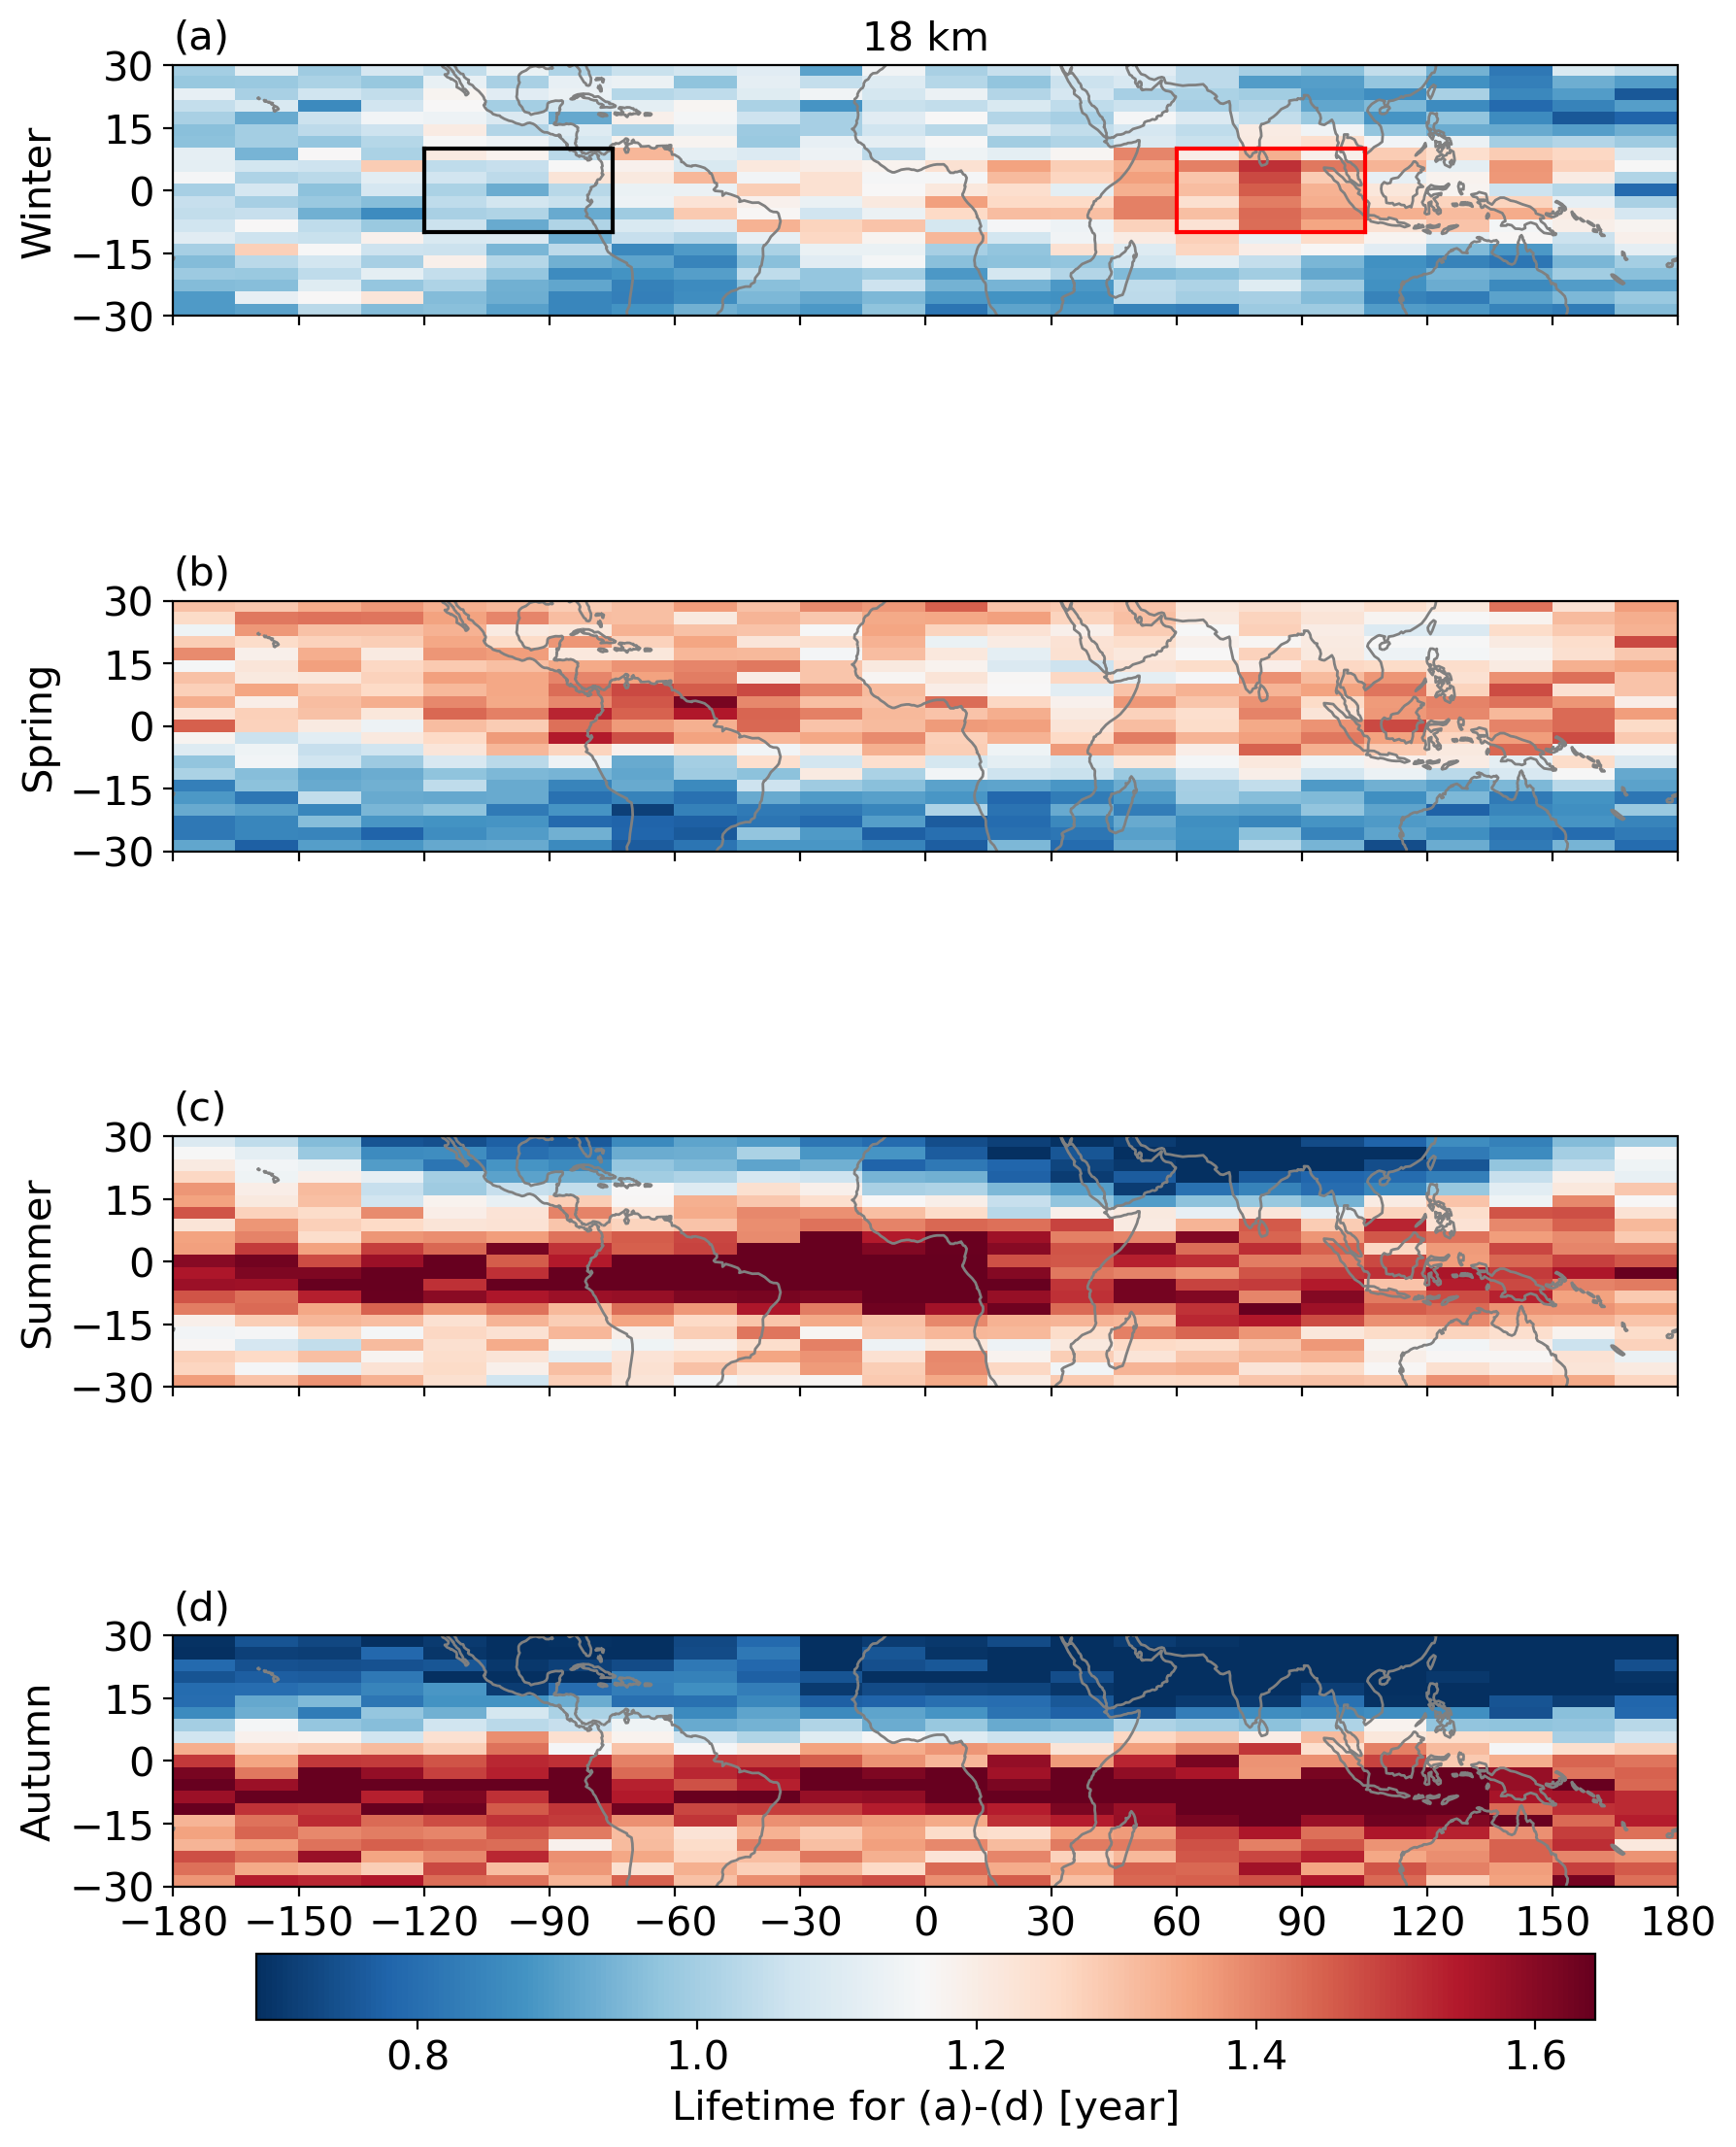

In [16]:
# Height   = [16,  18, 19, 20, 22, 24] # km

iz=1
print(Height[iz])

fig = plt.figure(figsize=(10,14), dpi=200)
projection = crs.PlateCarree()

if iz==0:
    Day_min = 50/365.25
    Day_max = 300/365.25 
if iz==1:
    Day_min = 250/365.25
    Day_max = 600/365.25 
if iz==2:
    Day_min = 300/365.25
    Day_max = 850/365.25  
if iz==3:
    Day_min = 400/365.25
    Day_max = 1100/365.25
    
    
extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,0]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

### add box to mark the high/low lifetime center
if iz==1:
    ax1.plot([60, 105], [-10, -10], 'r-')
    ax1.plot([60, 105], [10, 10], 'r-')
    ax1.plot([60, 60], [-10, 10], 'r-')
    ax1.plot([105, 105], [-10, 10], 'r-')

    ax1.plot([-75, -120],  [-10, -10], 'k-')
    ax1.plot([-75, -120],  [10, 10],   'k-')
    ax1.plot([-75, -75],   [-10, 10],  'k-')
    ax1.plot([-120, -120], [-10, 10],  'k-')
    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("18 km", fontsize=15)
ax1.set_ylabel("Winter", fontsize=15)
ax1.set_title("(a)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,1]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("Spring", fontsize=15)
ax2.set_title("(b)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,2]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("Summer", fontsize=15)
ax3.set_title("(c)", loc='left', fontsize=15)

###
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax4_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,3]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb4 = plt.colorbar(ax4_pixel, ax=ax4, orientation="horizontal")
cb4.set_label('Lifetime for (a)-(d) [year]', fontsize=15);
cb4.ax.tick_params(labelsize=15)

ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)

ax4.tick_params(axis='x', labelsize=15 )
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_ylabel("Autumn", fontsize=15)
ax4.set_title("(d)", loc='left', fontsize=15)

# fig.colorbar(ax=ax4, orientation='horizontal')
# plt.tight_layout()
# plt.colorbar()
# plt.set_label('[year]', fontsize=12)

plt.show()

20


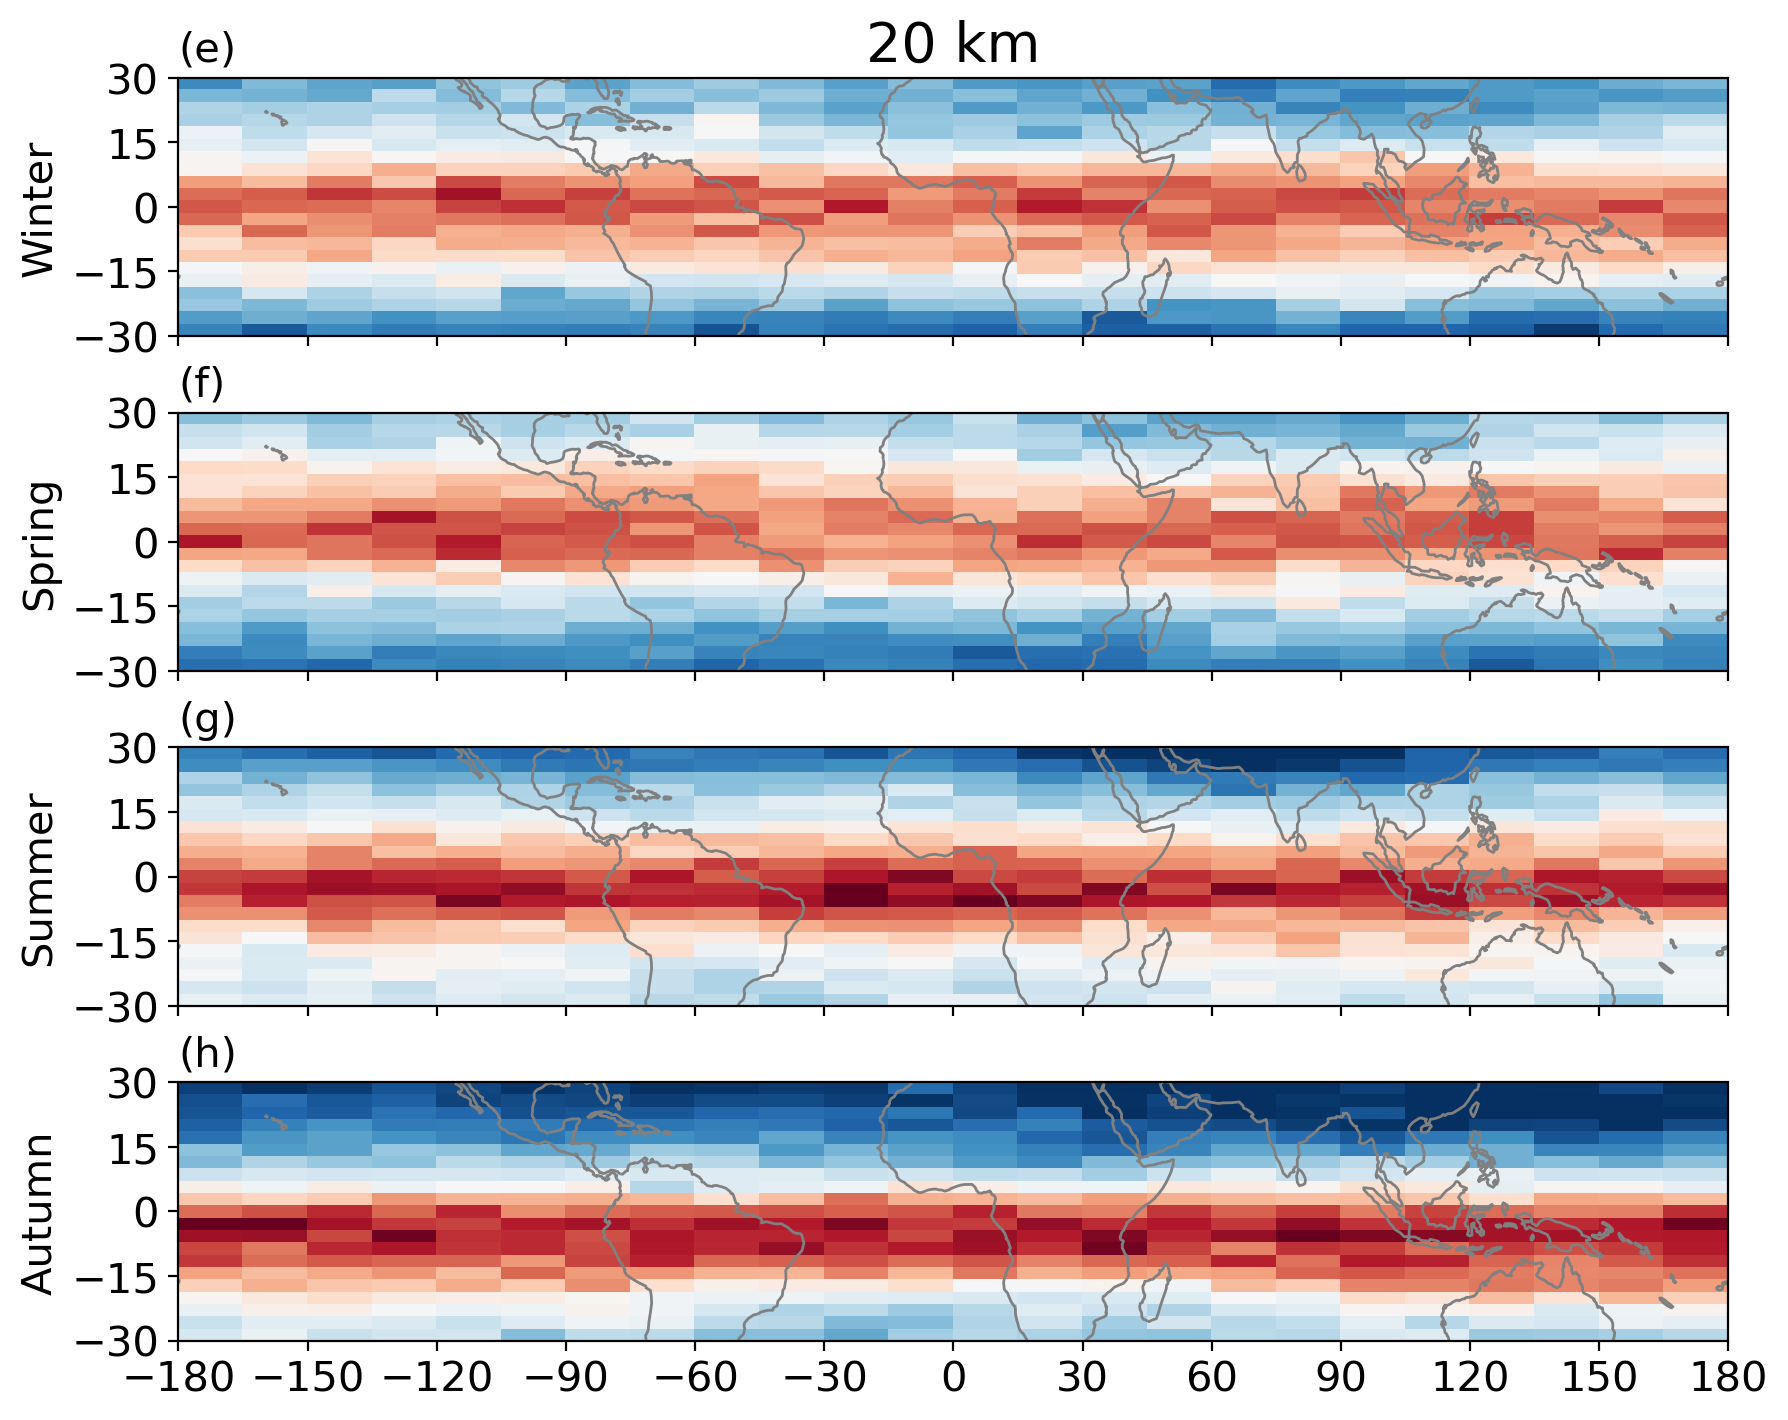

In [17]:
iz=3
print(Height[iz])

fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()

if iz==0:
    Day_min = 50/365.25
    Day_max = 300/365.25 
if iz==1:
    Day_min = 250/365.25
    Day_max = 600/365.25 
if iz==2:
    Day_min = 300/365.25
    Day_max = 850/365.25  
if iz==3:
    Day_min = 400/365.25
    Day_max = 1100/365.25
    
    
extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,0]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

### add box to mark the high/low lifetime center
if iz==1:
    ax1.plot([60, 105], [-10, -10], 'r-')
    ax1.plot([60, 105], [10, 10], 'r-')
    ax1.plot([60, 60], [-10, 10], 'r-')
    ax1.plot([105, 105], [-10, 10], 'r-')

    ax1.plot([-75, -120],  [-10, -10], 'k-')
    ax1.plot([-75, -120],  [10, 10],   'k-')
    ax1.plot([-75, -75],   [-10, 10],  'k-')
    ax1.plot([-120, -120], [-10, 10],  'k-')
    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("20 km", fontsize=20)
ax1.set_ylabel("Winter", fontsize=15)
ax1.set_title(f"(e)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,1]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("Spring", fontsize=15)
ax2.set_title("(f)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,2]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("Summer", fontsize=15)
ax3.set_title("(g)", loc='left', fontsize=15)

###
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax4_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,3]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)

ax4.tick_params(axis='x', labelsize=15 )
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_ylabel("Autumn", fontsize=15)
ax4.set_title("(h)", loc='left', fontsize=15)

# fig.colorbar(ax=ax4, orientation='horizontal')
# plt.tight_layout()
# plt.colorbar()
# plt.set_label('[year]', fontsize=12)

plt.show()

20


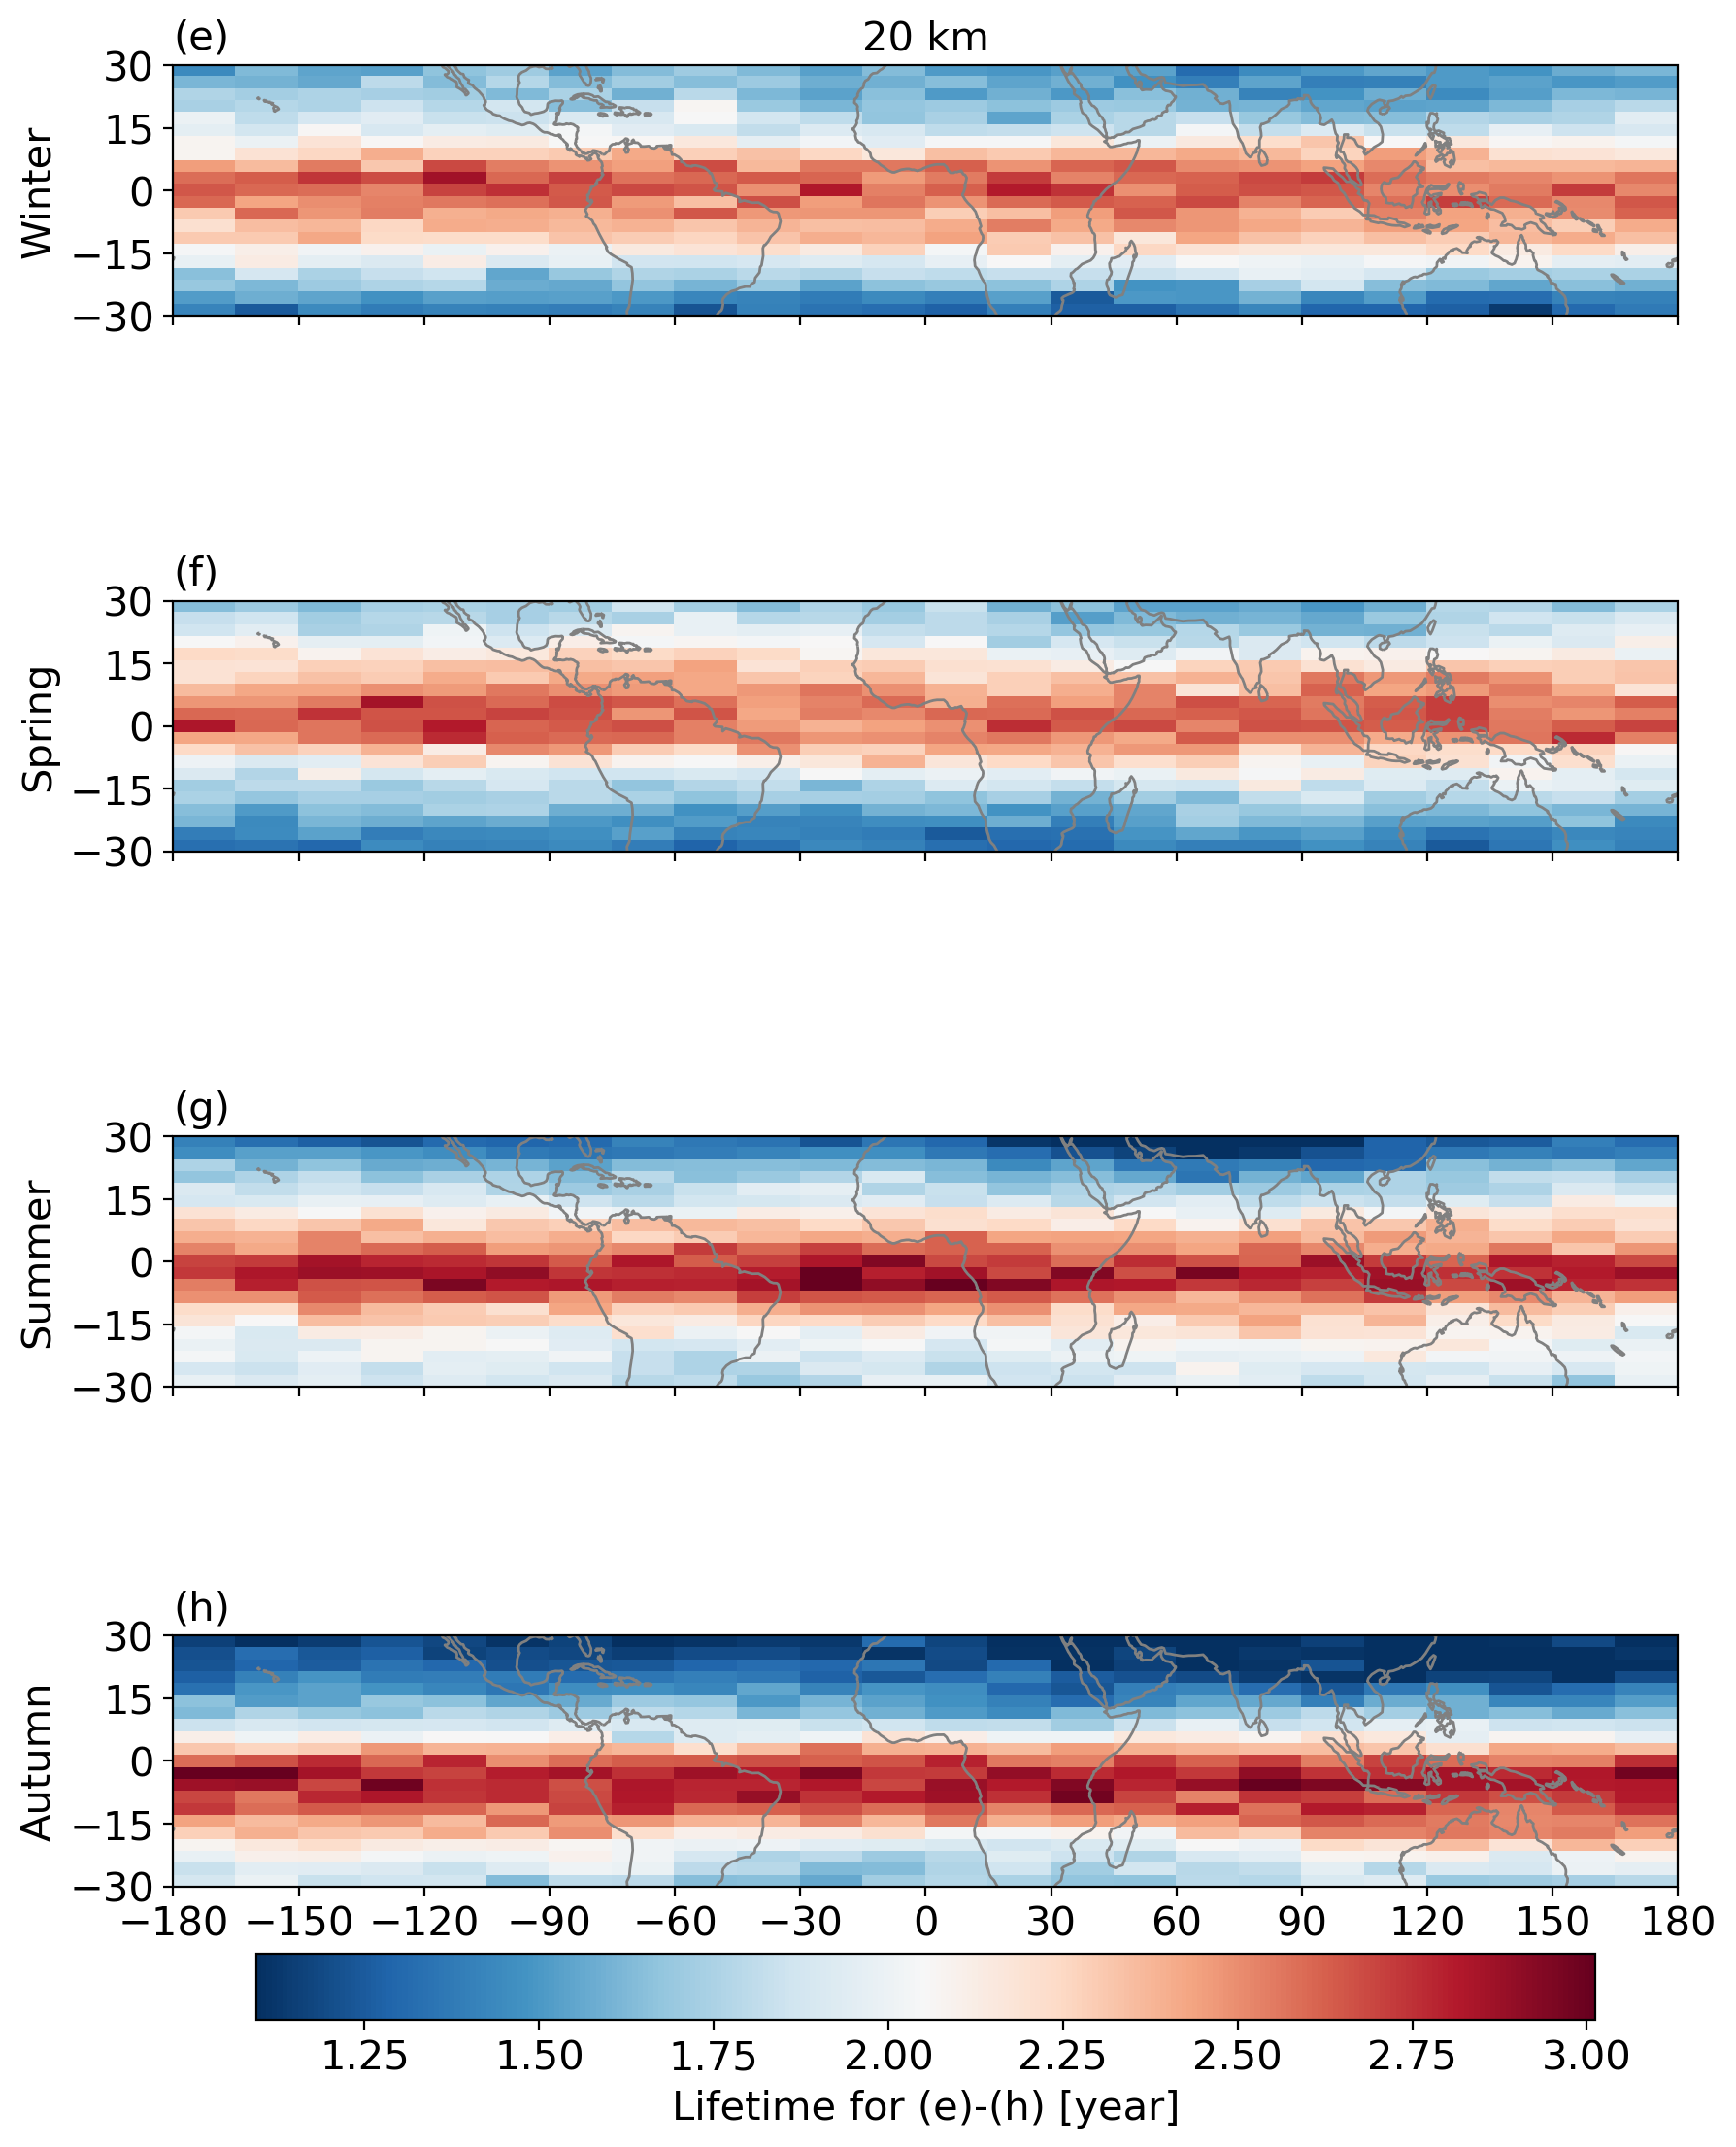

In [18]:

iz=3
print(Height[iz])

fig = plt.figure(figsize=(10,14), dpi=200)
projection = crs.PlateCarree()

if iz==0:
    Day_min = 50/365.25
    Day_max = 300/365.25 
if iz==1:
    Day_min = 250/365.25
    Day_max = 600/365.25 
if iz==2:
    Day_min = 300/365.25
    Day_max = 850/365.25  
if iz==3:
    Day_min = 400/365.25
    Day_max = 1100/365.25
    
    
extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,0]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

### add box to mark the high/low lifetime center
if iz==1:
    ax1.plot([60, 105], [-10, -10], 'r-')
    ax1.plot([60, 105], [10, 10], 'r-')
    ax1.plot([60, 60], [-10, 10], 'r-')
    ax1.plot([105, 105], [-10, 10], 'r-')

    ax1.plot([-75, -120],  [-10, -10], 'k-')
    ax1.plot([-75, -120],  [10, 10],   'k-')
    ax1.plot([-75, -75],   [-10, 10],  'k-')
    ax1.plot([-120, -120], [-10, 10],  'k-')
    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("20 km", fontsize=15)
ax1.set_ylabel("Winter", fontsize=15)
ax1.set_title("(e)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,1]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("Spring", fontsize=15)
ax2.set_title("(f)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,2]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("Summer", fontsize=15)
ax3.set_title("(g)", loc='left', fontsize=15)

###
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax4_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,3]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb4 = plt.colorbar(ax4_pixel, ax=ax4, orientation="horizontal")
cb4.set_label('Lifetime for (e)-(h) [year]', fontsize=15);
cb4.ax.tick_params(labelsize=15)

ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)

ax4.tick_params(axis='x', labelsize=15 )
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_ylabel("Autumn", fontsize=15)
ax4.set_title("(h)", loc='left', fontsize=15)

# fig.colorbar(ax=ax4, orientation='horizontal')
# plt.tight_layout()
# plt.colorbar()
# plt.set_label('[year]', fontsize=12)

plt.show()